Apos finalizar todos as 10 aulas, foi criado um biblioteca com toda as funções.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Main.funçoes import edo,Valor_esperado
from Main.estados import bases
from Main.operador import destruiçao,Identidade

In [2]:
wc = 1.0 * 2 * np.pi  # cavity frequency
wa = 1.0 * 2 * np.pi  # atom frequency
g = 0.05 * 2 * np.pi  # coupling strength

basefock = 2

psi0 = bases(basefock, 0)@ bases(2, 0)

# cavity mode operator
a = destruiçao(basefock)@Identidade(2)

# qubit/atom operators
sm = Identidade(basefock)@(destruiçao(2).dag())  # sigma-minus operator

# the Jaynes-Cumming Hamiltonian
H_acomplamento = g * ( a*(sm.dag()) + a.dag()*sm )

H = wc * a.dag() * a  + wa * sm.dag()*sm + H_acomplamento

tempo = np.linspace(0, 10, 100)  # Pontos de avaliação


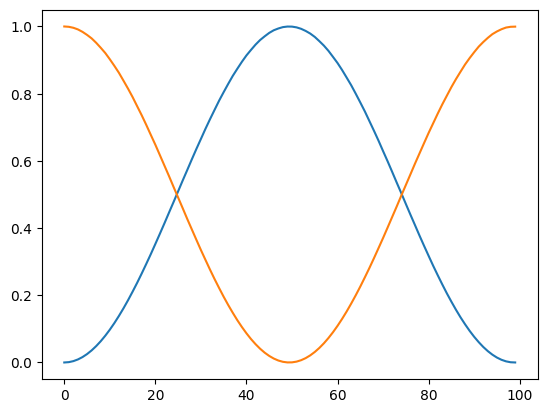

In [3]:
# Resolvendo a equação de Schrödinger e calculando o valor esperado
resultado = edo.solve(H, tempo, psi0)

# Definindo as observáveis
O1 = a.dag() * a  # Número de fótons no campo
O2 = sm.dag() * sm  # Sigma_z para o átomo

valores_esperados = Valor_esperado(resultado.y,[O1,O2])
plt.plot(valores_esperados[0])
plt.plot(valores_esperados[1])
plt.show()